
## DATA READING AND PREPROCESSING

## Daily Energy Consumption Data Overview


## Extracted from `dailyEnergyWithFeatures.xlsx`:

- **TimeReviewed**: The date on which energy consumption was recorded. This variable is essential for analyzing energy consumption trends over time.
- **Solar_Power_Consumption(Kw)**: The amount of solar power consumed on the corresponding date, measured in kilowatts. It's the primary target variable for our predictive modeling efforts.
- **Temp(C)**: The average temperature on the day of measurement, in degrees Celsius. Temperature can significantly influence energy consumption, making this a critical predictive feature.
- **EmployeeCount**: The number of employees present on the date of measurement. This variable helps understand the operational intensity and its impact on energy usage.

## Extracted from `energy.xlsx`:

- **TimeReviewed**: As above, this indicates the date of energy consumption measurement and is pivotal for temporal analysis.
- **Solar_Power_Consumption(Kw)**: This is the daily solar power consumption measured in kilowatts, serving as the target variable for our prediction models.
- **Temp(C)**: Average temperature on the day, which is a key feature due to its impact on how much energy is consumed.
- **EmployeeCount**: Reflects the number of employees working on the given day, influencing the level of energy consumption.
- **weekday**: The day of the week, encoded numerically, is important for identifying weekly patterns in energy consumption.
- **day_type**: A binary indicator distinguishing between working days (1) and non-working days or weekends (0), useful for modeling differences in energy usage based on building occupancy and operational status.

These variables are instrumental for developing models to predict solar energy consumption patterns and understanding the effects of various factors on energy usage.



In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # module for plotting 
import numpy.linalg as lin # module for performing lin algebra operations
from __future__ import division
from math import log10,exp


In [9]:
#Daily consumption
raw_data = pd.read_excel("SolarGeneration_Data.xlsx", sheet_name = 2)
raw_data.head(10)

,TIMESTAMP,Solar_Power_Consumption(Kw)
0,2019-05-14 12:10:00.000,32.055000
1,2019-05-14 12:09:00.007,26.976000
2,2019-05-14 12:08:00.003,31.302999
3,2019-05-14 12:07:00.940,37.044998
4,2019-05-14 12:06:00.737,38.083000
5,2019-05-14 12:05:00.530,38.153999
6,2019-05-14 12:04:00.270,38.240002
7,2019-05-14 12:03:00.020,38.162998
8,2019-05-14 12:02:00.800,38.304001
9,2019-05-14 12:01:00.550,38.443001


# Data Reading and Preprocessing

This section outlines the initial steps of our analysis, focusing on reading the data from `SolarGeneration_Data.xlsx` and performing preliminary preprocessing. We've described the variables from both `dailyEnergyWithFeatures.xlsx` and `energy.xlsx` datasets that are pivotal in developing models to predict solar energy consumption patterns. The following steps include loading the raw solar power consumption data, setting appropriate datetime indices, and summarizing the data for daily and hourly consumption analysis.


In [11]:
raw_data['TimeReviewed'] = pd.to_datetime(raw_data['TIMESTAMP'])
raw_data = raw_data.set_index('TimeReviewed')
raw_data.drop(['TIMESTAMP'], axis=1, inplace=True)
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 292646 entries, 2019-05-14 12:10:00 to 2017-12-26 06:38:00.003000
Data columns (total 1 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Solar_Power_Consumption(Kw)  292646 non-null  float64
dtypes: float64(1)
memory usage: 4.5 MB


In [12]:
energydaily = raw_data.resample('D').sum()
energydaily.rename(columns = {"Solar_Power_Consumption(Kw)": "Solar_Power_Consumption(Kwh)"})


,Solar_Power_Consumption(Kwh)
TimeReviewed,
2017-12-26,12782.411988
2017-12-27,13883.010020
2017-12-28,13766.083029
2017-12-29,12904.092990
2017-12-30,7985.972000
...,...
2019-05-10,15619.215017
2019-05-11,9179.519970
2019-05-12,0.000000


<Figure size 640x480 with 0 Axes>

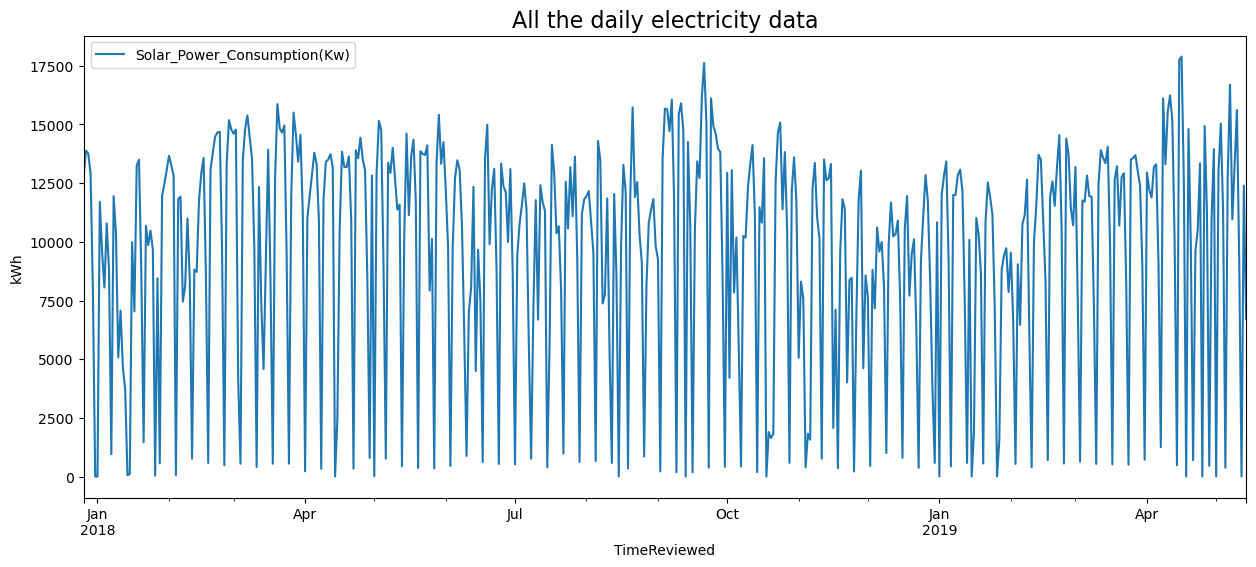

<Figure size 640x480 with 0 Axes>

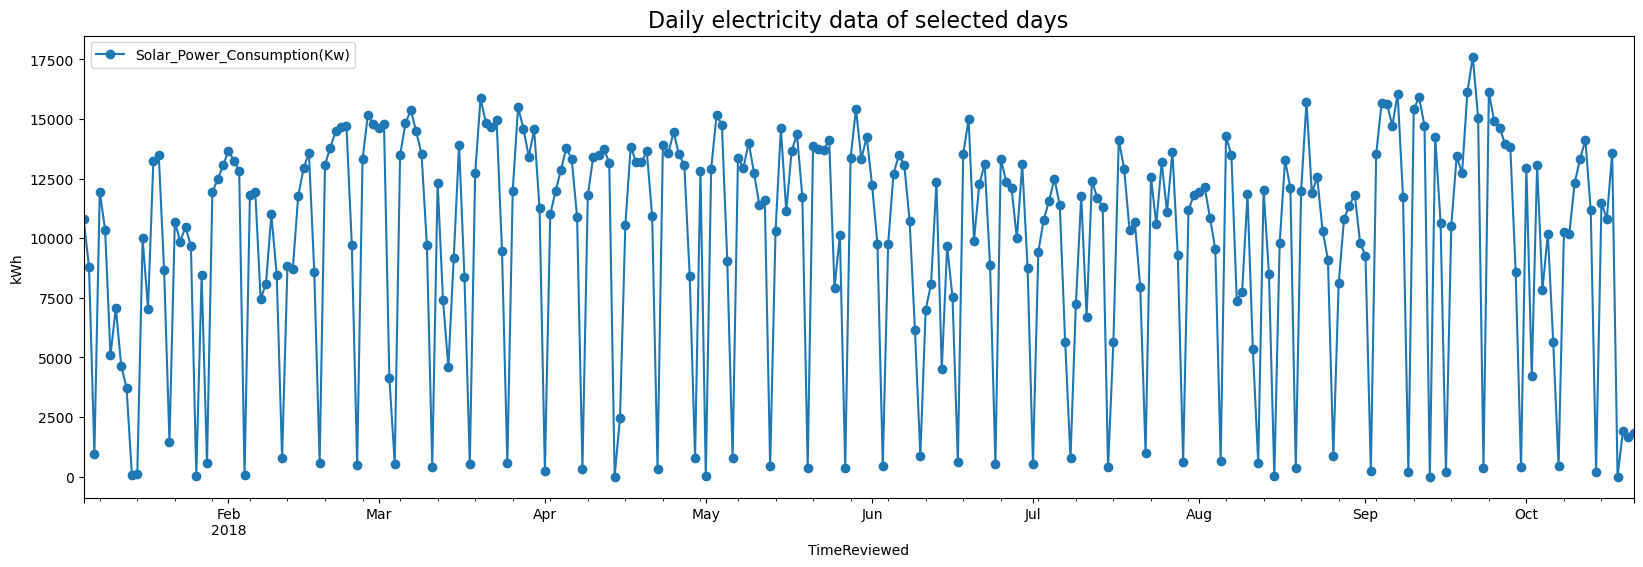

In [49]:
plt.figure()
fig = energydaily.plot(figsize = (15, 6))
plt.title('All the daily electricity data', fontsize = 16)
plt.ylabel('kWh')
plt.show()

plt.figure()
fig = energydaily.iloc[10:300,:].plot(marker = 'o', figsize = (20, 6))
plt.title('Daily electricity data of selected days', fontsize = 16)
plt.ylabel('kWh')
plt.show()

## Daily and Hourly Consumption Analysis

Here, we delve into the analysis of solar power consumption on both daily and hourly bases. This exploration is essential to understand the variability and trends in energy usage over different time frames. By resampling the raw data, we calculate the total solar power consumed each day and each hour, providing insights into the consumption patterns and preparing the data for further analysis.


In [14]:
energyhourly = raw_data.resample('H').sum()
energyhourly.rename(columns = {"Solar_Power_Consumption(Kw)": "Solar_Power_Consumption(Kwh)"})

,Solar_Power_Consumption(Kwh)
TimeReviewed,
2017-12-26 06:00:00,12.267000
2017-12-26 07:00:00,259.792000
2017-12-26 08:00:00,763.362001
2017-12-26 09:00:00,1375.903006
2017-12-26 10:00:00,1719.122997
...,...
2019-05-14 08:00:00,650.538997
2019-05-14 09:00:00,1390.019003
2019-05-14 10:00:00,1739.818999


<Figure size 640x480 with 0 Axes>

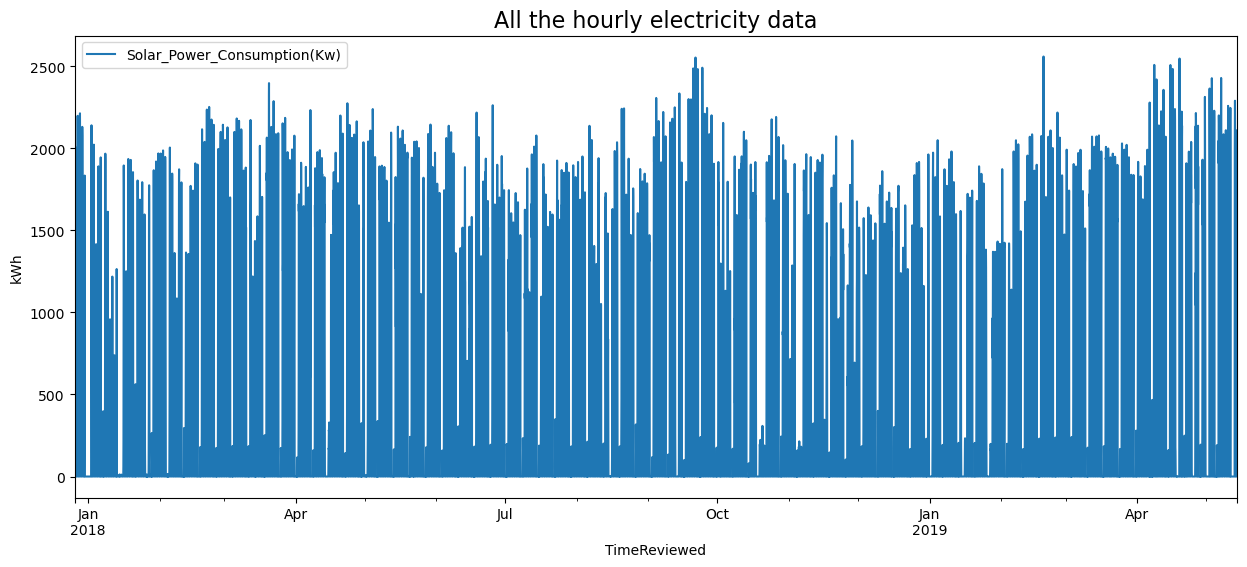

<Figure size 640x480 with 0 Axes>

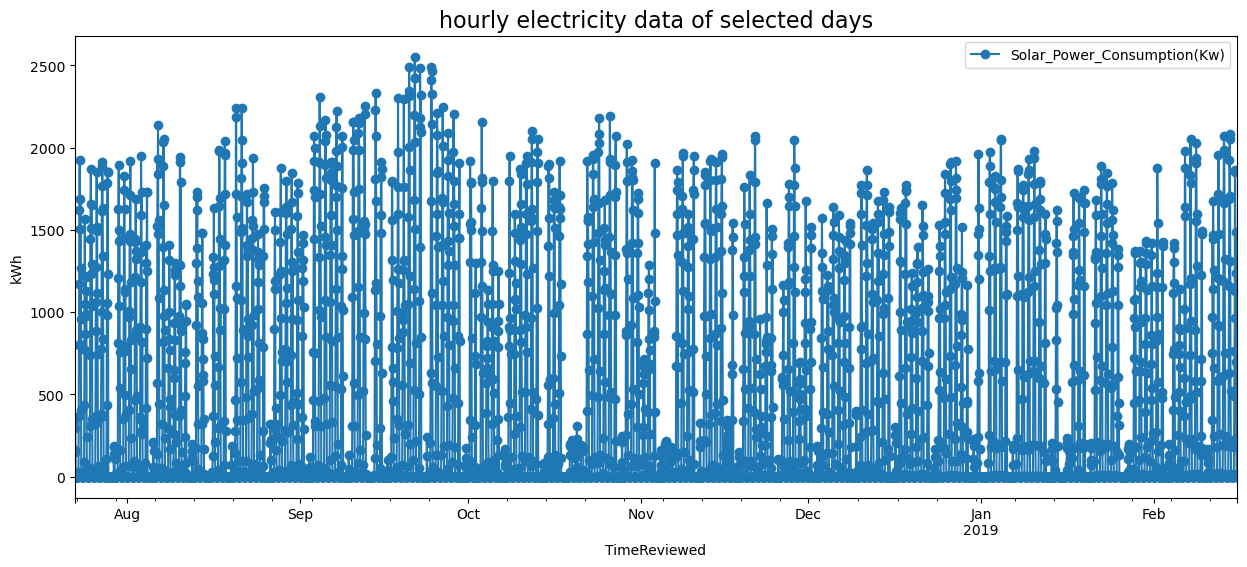

In [15]:
plt.figure()
fig = energyhourly.plot(figsize = (15, 6))
plt.title('All the hourly electricity data', fontsize = 16)
plt.ylabel('kWh')
plt.show()

plt.figure()
fig = energyhourly.iloc[5000:10000,:].plot(marker = 'o', figsize = (15, 6))
plt.title('hourly electricity data of selected days', fontsize = 16)
plt.ylabel('kWh')
plt.show()

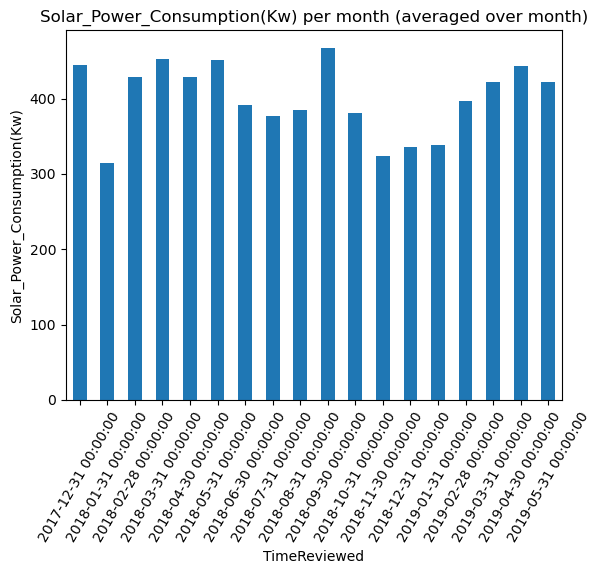

In [16]:
energyhourly['Solar_Power_Consumption(Kw)'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Solar_Power_Consumption(Kw)')
plt.title('Solar_Power_Consumption(Kw) per month (averaged over month)')
plt.show()

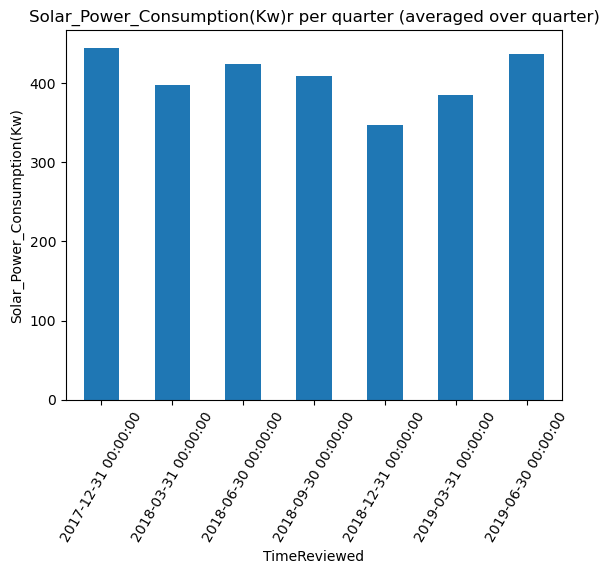

In [17]:
energyhourly['Solar_Power_Consumption(Kw)'].resample('Q').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Solar_Power_Consumption(Kw)')
plt.title('Solar_Power_Consumption(Kw)r per quarter (averaged over quarter)')
plt.show()

## Weather Data Preprocessing

The weather significantly influences solar power generation. This section is dedicated to preprocessing the weather data, which includes temperature measurements that correspond with our energy consumption data. We perform similar steps as with the consumption data, setting datetime indices and resampling to align with our analysis needs.


In [20]:
weather_data= pd.read_excel("SolarGeneration_Data.xlsx",sheet_name=3)
weather_data.rename(columns = {"Value": "Temp(C)"})


,TimeStamp,Temp( C)
0,2019-05-14 12:00:00.063,26
1,2019-05-14 11:45:00.023,26
2,2019-05-14 11:30:00.033,26
3,2019-05-14 11:15:00.027,26
4,2019-05-14 11:00:00.067,26
...,...,...
47773,2017-12-26 01:00:00.033,26
47774,2017-12-26 00:45:00.020,26
47775,2017-12-26 00:30:00.017,26
47776,2017-12-26 00:15:00.033,26


In [21]:
weather_data['TimeReviewed'] = pd.to_datetime(weather_data['TimeStamp'])
weather_data = weather_data.set_index('TimeReviewed')
weather_data.drop(['TimeStamp'], axis=1, inplace=True)
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47778 entries, 2019-05-14 12:00:00.063000 to 2017-12-26 00:00:00.047000
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Temp( C)  47778 non-null  int64
dtypes: int64(1)
memory usage: 746.5 KB


## Analyzing Temperature Effects

To further our understanding of how weather conditions, specifically temperature, affect solar power consumption, we analyze hourly and daily temperature variations. This analysis aims to reveal correlations between temperature changes and solar energy usage, underpinning the significance of including environmental variables in our predictive models.


In [22]:
weatherhourly = weather_data.resample('H').mean()
weatherhourly

,Temp( C)
TimeReviewed,
2017-12-26 00:00:00,26.0
2017-12-26 01:00:00,26.0
2017-12-26 02:00:00,26.0
2017-12-26 03:00:00,26.0
2017-12-26 04:00:00,26.0
...,...
2019-05-14 08:00:00,28.0
2019-05-14 09:00:00,28.0
2019-05-14 10:00:00,28.0


<Figure size 640x480 with 0 Axes>

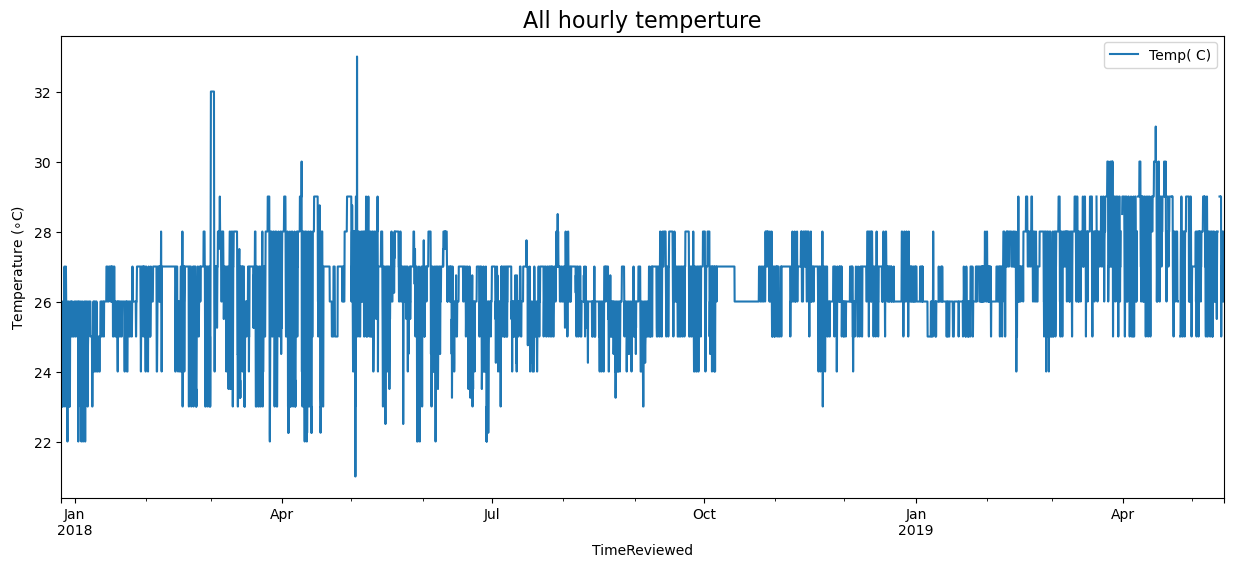

<Figure size 640x480 with 0 Axes>

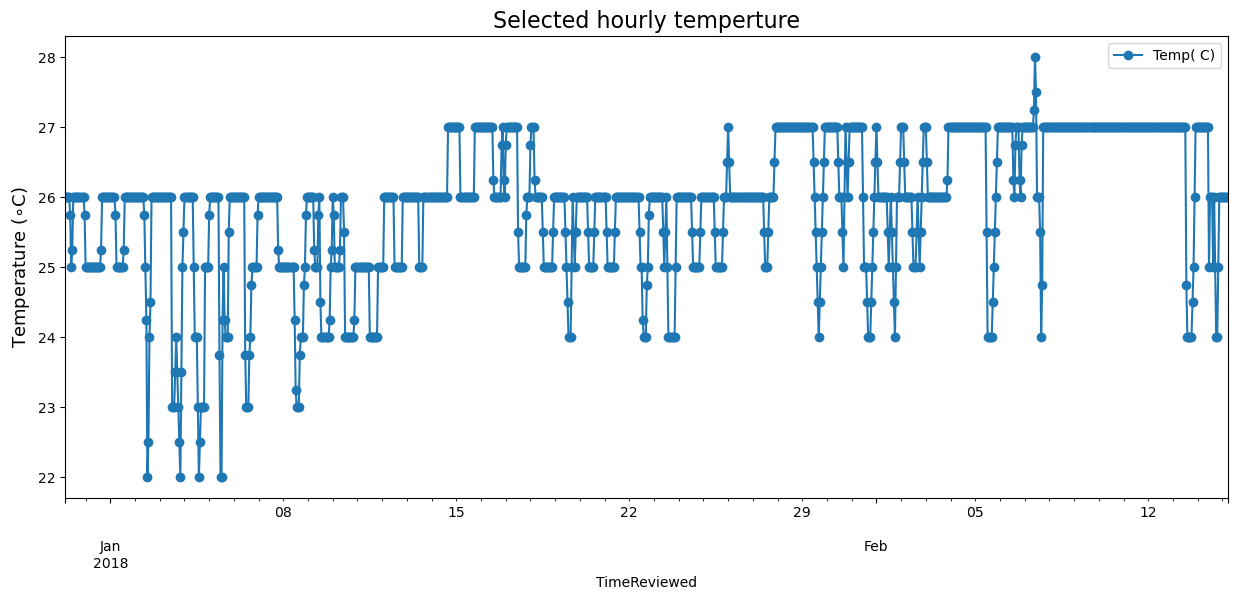

In [23]:
plt.figure()
fig = weatherhourly.plot(y = 'Temp( C)', figsize = (15, 6))
plt.title('All hourly temperture', fontsize = 16)
plt.ylabel(r'Temperature ($\circ$C)')
plt.show()


plt.figure()
fig = weatherhourly.iloc[100:1230].plot(y = 'Temp( C)', figsize = (15, 6), marker = 'o')
plt.title('Selected hourly temperture',fontsize = 16)
plt.ylabel(r'Temperature ($\circ$C)',fontsize = 13)
plt.show()


**daily temperature**

In [24]:
weatherdaily = weather_data.resample('D').mean()
weatherdaily

,Temp( C)
TimeReviewed,
2017-12-26,25.000000
2017-12-27,25.375000
2017-12-28,24.833333
2017-12-29,24.833333
2017-12-30,25.906250
...,...
2019-05-10,27.041667
2019-05-11,26.662921
2019-05-12,29.000000


<Figure size 640x480 with 0 Axes>

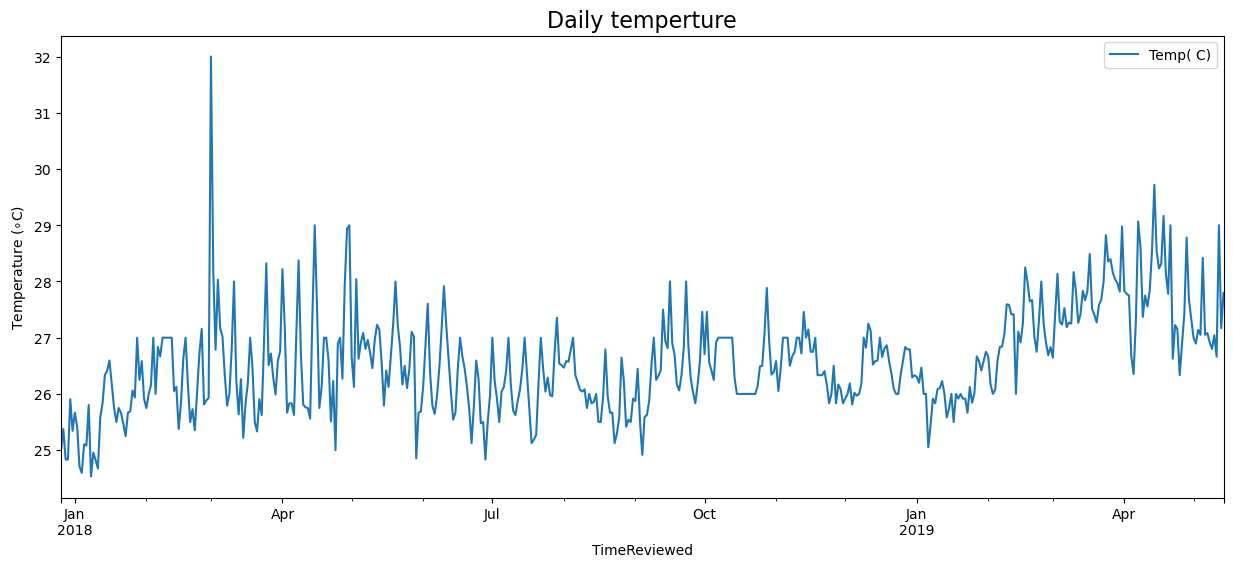

<Figure size 640x480 with 0 Axes>

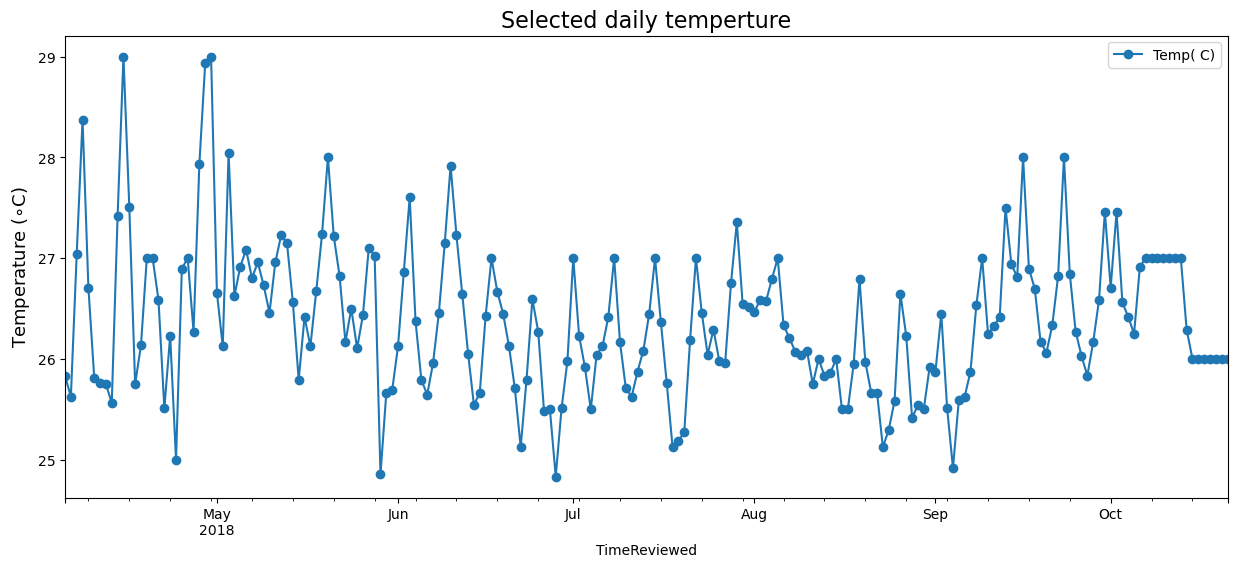

In [25]:
plt.figure()
fig = weatherdaily.plot(y = 'Temp( C)', figsize = (15, 6))
plt.title('Daily temperture', fontsize = 16)
plt.ylabel(r'Temperature ($\circ$C)')
plt.show()


plt.figure()
fig = weatherdaily.iloc[100:300].plot(y = 'Temp( C)', figsize = (15, 6), marker = 'o')
plt.title('Selected daily temperture',fontsize = 16)
plt.ylabel(r'Temperature ($\circ$C)',fontsize = 13)
plt.show()

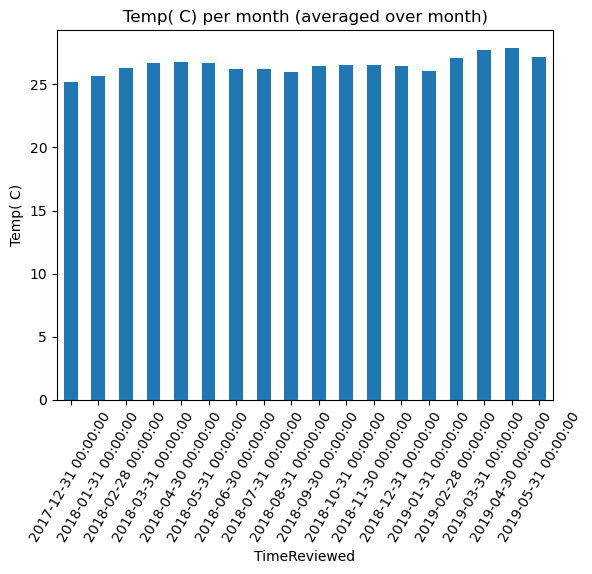

In [26]:
weatherhourly['Temp( C)'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Temp( C)')
plt.title('Temp( C) per month (averaged over month)')
plt.show()

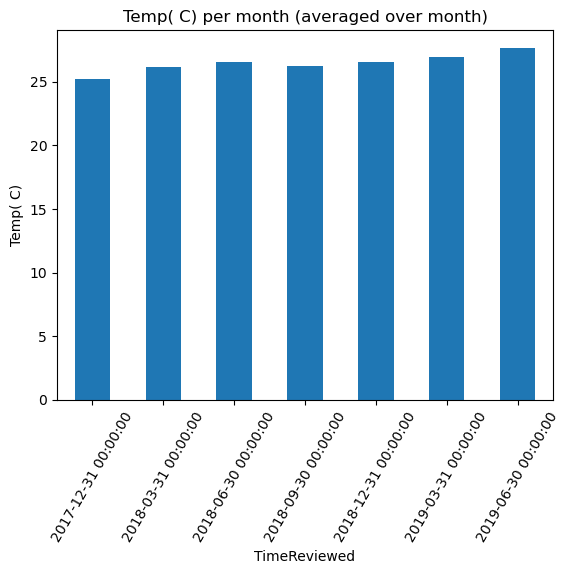

In [27]:
weatherhourly['Temp( C)'].resample('Q').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Temp( C)')
plt.title('Temp( C) per month (averaged over month)')
plt.show()

## Employee Count Analysis

Employee count is another crucial factor that can influence energy consumption patterns, especially in organizational settings. In this section, we analyze the number of employees present daily, considering its potential impact on solar power usage. This step involves data loading, preprocessing, and visualization to assess the relationship between operational activity levels and energy consumption.


In [28]:
employee= pd.read_excel("SolarGeneration_Data.xlsx",sheet_name=5)
employee_data = pd.DataFrame(data=employee,columns=['DATE','EmployeeCount'])
employee_data.head(10)

,DATE,EmployeeCount
0,2019-05-14,103
1,2019-05-14,90
2,2019-05-13,100
3,2019-05-13,86
4,2019-05-12,11
5,2019-05-11,88
6,2019-05-11,78
7,2019-05-10,92
8,2019-05-10,92
9,2019-05-09,99


In [29]:
employee_data['TimeReviewed'] = pd.to_datetime(employee_data['DATE'])
employee_data = employee_data.set_index('TimeReviewed')
employee_data.drop(['DATE'], axis=1, inplace=True)
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 972 entries, 2019-05-14 to 2017-12-26
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   EmployeeCount  972 non-null    int64
dtypes: int64(1)
memory usage: 15.2 KB


In [30]:
empdaily = employee_data.resample('D').sum()
empdaily

,EmployeeCount
TimeReviewed,
2017-12-26,121
2017-12-27,0
2017-12-28,0
2017-12-29,0
2017-12-30,0
...,...
2019-05-10,184
2019-05-11,166
2019-05-12,11


<Figure size 640x480 with 0 Axes>

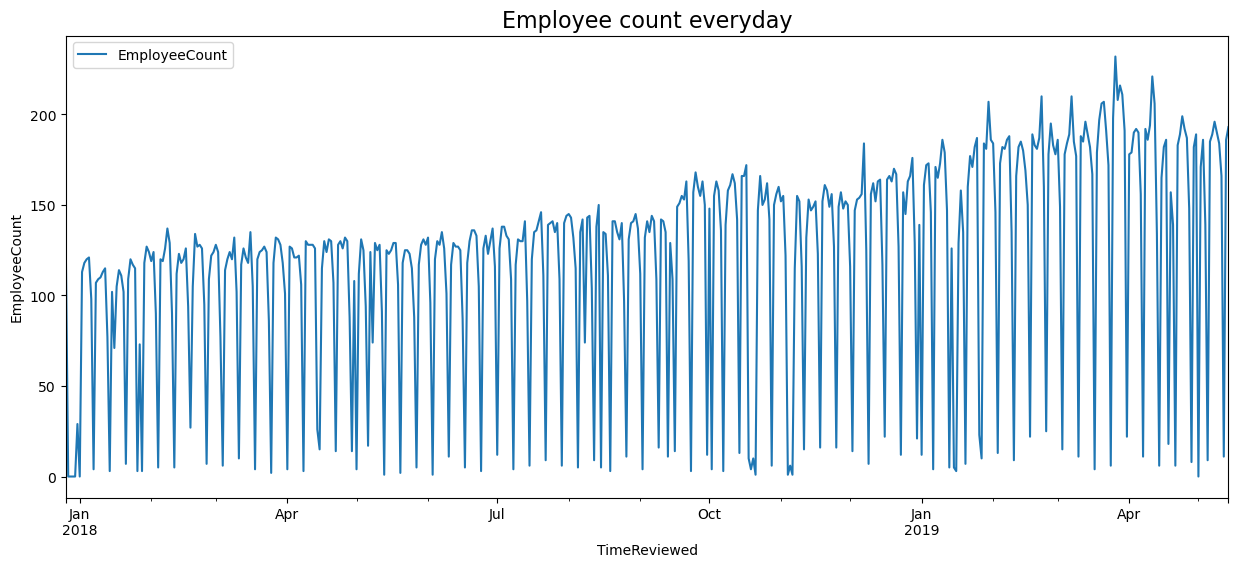

<Figure size 640x480 with 0 Axes>

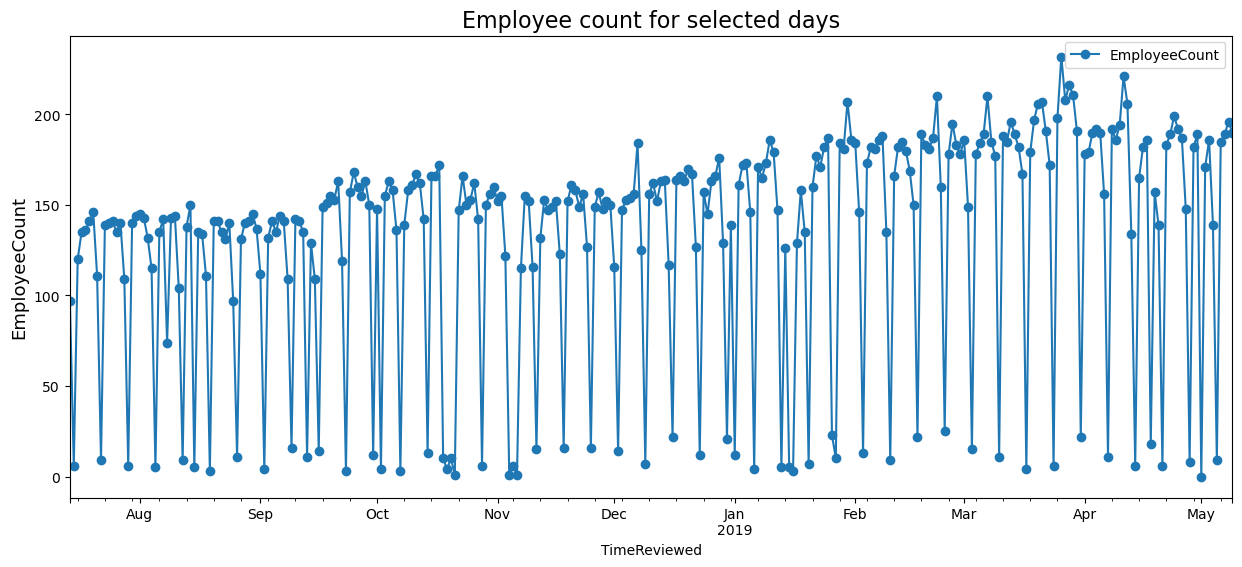

In [31]:
plt.figure()
fig = empdaily.plot(y = 'EmployeeCount', figsize = (15, 6))
plt.title('Employee count everyday', fontsize = 16)
plt.ylabel(r'EmployeeCount')
plt.show()


plt.figure()
fig = empdaily.iloc[200:500].plot(y = 'EmployeeCount', figsize = (15, 6), marker = 'o')
plt.title('Employee count for selected days',fontsize = 16)
plt.ylabel(r'EmployeeCount',fontsize = 13)
plt.show()

In [33]:
dailyEnergyWithFeatures = energydaily.join(weatherdaily, how = 'inner')
dailyEnergyWithFeatures = dailyEnergyWithFeatures.join(empdaily, how = 'inner')
dailyEnergyWithFeatures.dropna(axis=0, how='any', inplace = True)
dailyEnergyWithFeatures.to_excel('dailyEnergyWithFeatures.xlsx')  
dailyEnergyWithFeatures.head(100)


,Solar_Power_Consumption(Kw),Temp( C),EmployeeCount
TimeReviewed,,,
2017-12-26,12782.411988,25.000000,121
2017-12-27,13883.010020,25.375000,0
2017-12-28,13766.083029,24.833333,0
2017-12-29,12904.092990,24.833333,0
2017-12-30,7985.972000,25.906250,0
...,...,...,...
2018-03-31,11252.973974,26.760417,101
2018-04-01,221.690000,28.218750,4
2018-04-02,11000.894991,27.187500,127


In [34]:
dailyEnergyWithFeatures.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 505 entries, 2017-12-26 to 2019-05-14
Freq: D
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Solar_Power_Consumption(Kw)  505 non-null    float64
 1   Temp( C)                     505 non-null    float64
 2   EmployeeCount                505 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 31.9 KB


**Compare each column resampled over a week**

In [37]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to s

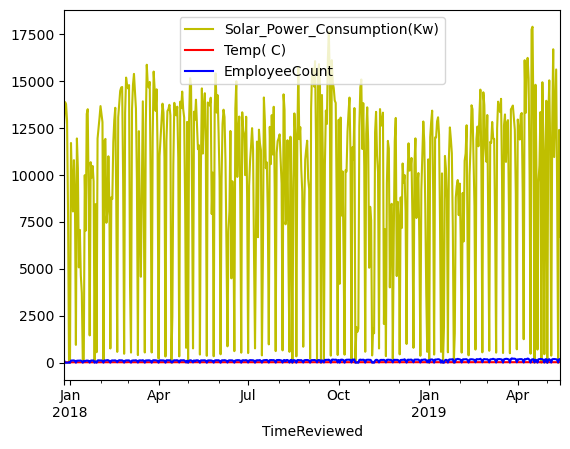

In [36]:
plt.figure()
## resampling over week and computing mean
#dailyEnergyWithFeatures[dailyEnergyWithFeatures[['TimeReviewed']] .notnull()].set_index('TimeReviewed').resample('W')
fig = dailyEnergyWithFeatures['Solar_Power_Consumption(Kw)'].plot(color='y', legend=True)
dailyEnergyWithFeatures['Temp( C)'].plot(color='r', legend=True)
dailyEnergyWithFeatures['EmployeeCount'].plot(color='b', legend=True)
plt.show()

## Exploratory Data Analysis (EDA)

In this crucial phase, we employ exploratory data analysis techniques to uncover underlying patterns, relationships, and anomalies in the combined dataset. EDA is instrumental in guiding our modeling strategies, helping to identify significant predictors of solar power consumption and refine our approach to forecasting.


In [44]:
%matplotlib inline 
#!pip install holidays
import requests 
import numpy as np
import pandas as pd # pandas
import matplotlib.pyplot as plt # module for plotting 
import datetime as dt # module for manipulating dates and times
import numpy.linalg as lin # module for performing linear algebra operations
from __future__ import division
import matplotlib
from datetime import date
import holidays


In [45]:
dailyEnergyWithFeatures = pd.read_excel('dailyEnergyWithFeatures.xlsx')

**Correlation between number of employees and Solar energy**

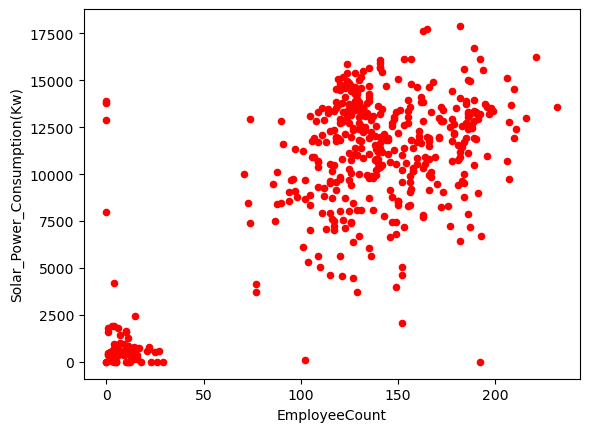

In [46]:
dailyEnergyWithFeatures.plot(kind='scatter',x='EmployeeCount',y='Solar_Power_Consumption(Kw)',color='red')
plt.show()

**Correlation between Temperature and Solar energy**

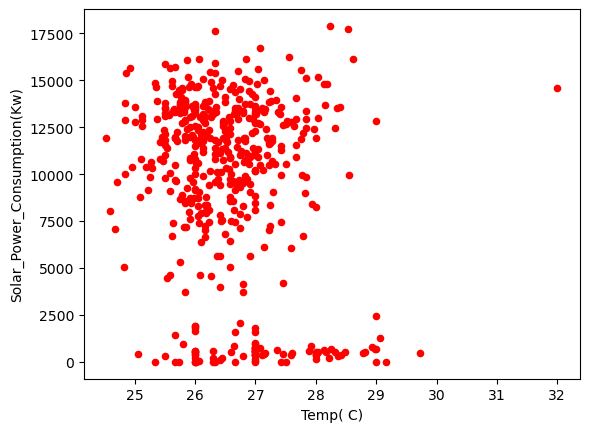

In [47]:
dailyEnergyWithFeatures.plot(kind='scatter',x='Temp( C)',y='Solar_Power_Consumption(Kw)',color='red')
plt.show()

## Correlation between Number of Employees and Solar Energy

This analysis investigates the relationship between the number of employees present (operational intensity) and solar power consumption. The expectation is that days with more employees might show higher energy usage patterns due to increased activities and demand for resources like lighting, HVAC, and electronic devices.


## Correlation between Temperature and Solar Energy

Temperature plays a critical role in influencing solar power generation and consumption. Higher temperatures might increase the need for cooling, thereby raising power consumption, while also potentially affecting solar panel efficiency. This section explores how temperature variations correlate with changes in solar power consumption, aiming to identify trends that can inform our predictive models.

### Model Development and Predictions

After exploring and understanding the data through preprocessing and EDA, the next steps involve developing predictive models. These models will leverage the insights gained from the previous analyses, using variables such as temperature, employee count, and time factors to forecast solar power consumption. The process includes selecting appropriate modeling techniques, training the models on historical data, and evaluating their performance through metrics such as accuracy, R² (coefficient of determination), and RMSE (Root Mean Square Error).

### Conclusion and Insights

The final section of our analysis will summarize the findings from our exploratory data analysis and modeling efforts. It will discuss the key insights gained about the factors influencing solar power consumption and the performance of our predictive models. This will include reflections on the model's ability to forecast energy usage accurately and recommendations for future improvements, potentially highlighting areas for further research or application of more complex modeling techniques.

### Implementing Recommendations

Based on the conclusions drawn, we might suggest actionable recommendations for energy management, such as optimizing the use of solar power based on predicted consumption patterns, adjusting operational activities to align with energy availability, or further investing in temperature control measures to mitigate its impact on energy usage. These recommendations aim to support decision-making processes in energy planning, sustainability efforts, and operational optimizations, contributing to more efficient and environmentally friendly practices.
